In [38]:
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
%matplotlib inline

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

## Loading the data

In [41]:
# Features

train_x = pd.read_csv('train_x.csv')
test_x = pd.read_csv('test_x.csv')

# Lables

train_y = pd.read_csv('train_y.csv')
test_y = pd.read_csv('test_y.csv')


Create a basic RandomForestClassifier model.

In [42]:
model = RandomForestClassifier(n_estimators = 100,
                               oob_score = True,
                               random_state = 1)

In [43]:
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [44]:
pred = model.predict(test_x)

In [45]:
print ("AUC-ROC (test) = ", roc_auc_score(test_y, pred))

AUC-ROC (test) =  0.628145508665705


## Feature importance and feature selection

### Estimate variable importance

In [46]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
import shap

In [47]:
shap.initjs()

[]

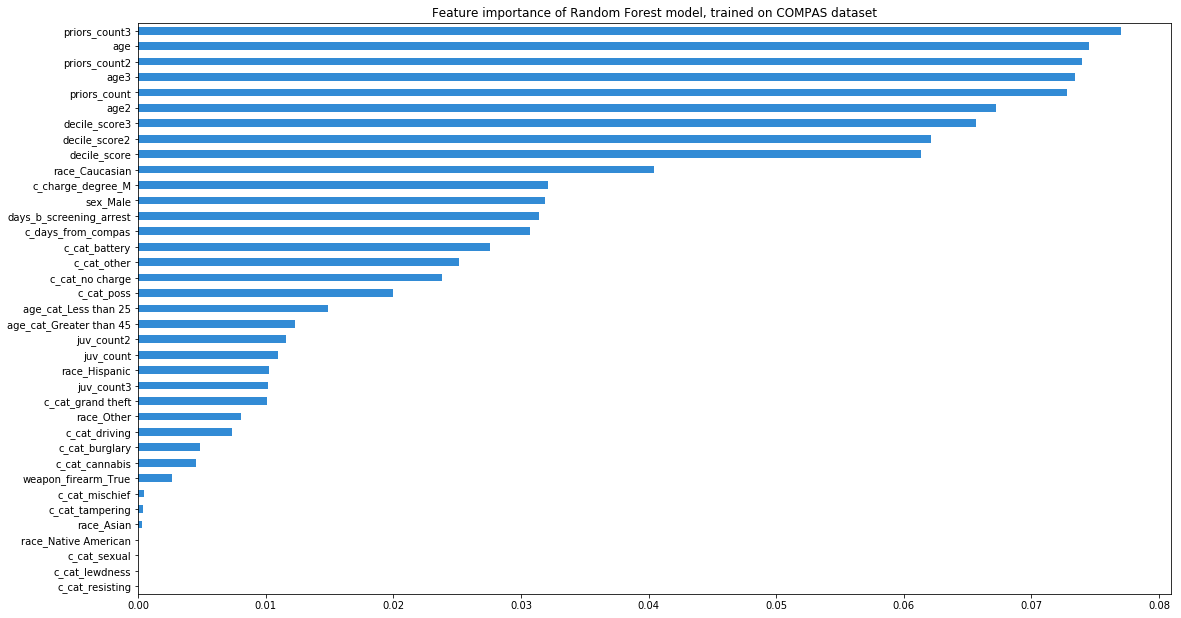

In [48]:
# Create interpreter for our testing data

interpreter = Interpretation(test_x, feature_names = train_x.columns)

# Load model in Skater memory

mem_model = InMemoryModel(model.predict_proba, examples = train_x)

# Generate feature importance plots 

f = plt.figure(figsize=(10,3))

plots = interpreter.feature_importance.plot_feature_importance(mem_model, ascending = True, progressbar=False)
figure = plots[0]
figure.set_size_inches(18.5, 10.5)
ax = plots[1]
ax.set_title("Feature importance of Random Forest model, trained on COMPAS dataset")
ax.plot()

### The relationship between a variable and a models predictions

In [49]:
def plotNegativeClassFeatureRelation(feature_names, tick_labels_list = None, cust_title = None):
    mem_model = InMemoryModel(model.predict_proba, examples = train_x, 
                         target_names=['Probability of no recidive', 'Probability of recidive'])
    
    axes_list = interpreter.partial_dependence.plot_partial_dependence(feature_names, mem_model, grid_resolution=25, 
                                                                   with_variance=True, figsize = (8, 4), progressbar=False)
    ax = axes_list[0][1]
    
    title = 'Dependence between ' + feature_names[0] + ' and predicted label'
       
    if(tick_labels_list != None):
        ax.set_xticklabels(tick_labels_list)

    ax.set_title(title)
    ax.set_ylim(0, 1)


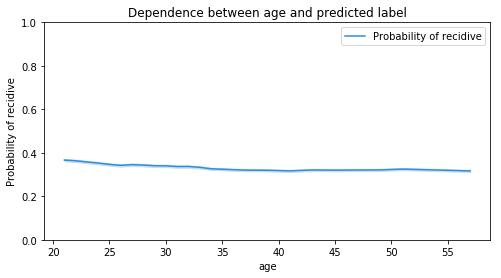

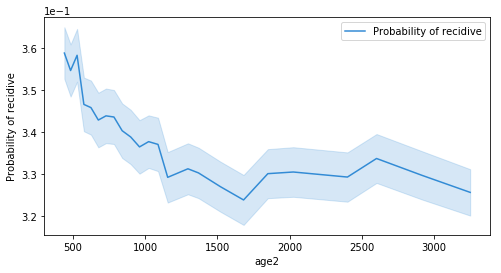

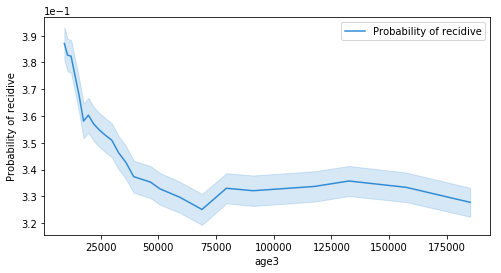

In [50]:
plotNegativeClassFeatureRelation(['age', 'age2', 'age3'])

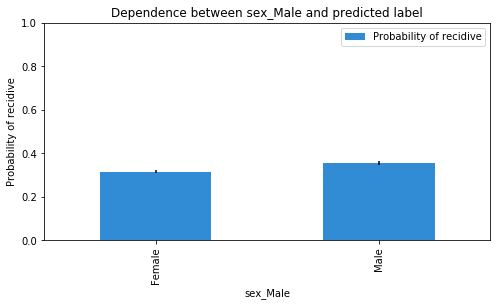

In [51]:
plotNegativeClassFeatureRelation(['sex_Male'], tick_labels_list = ['Female', 'Male'])

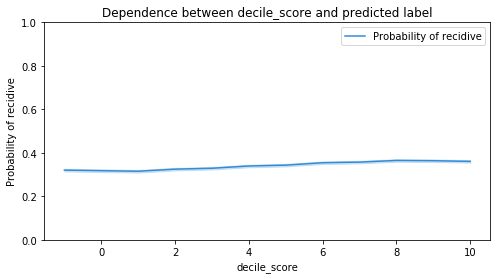

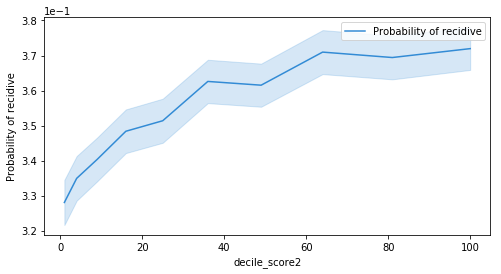

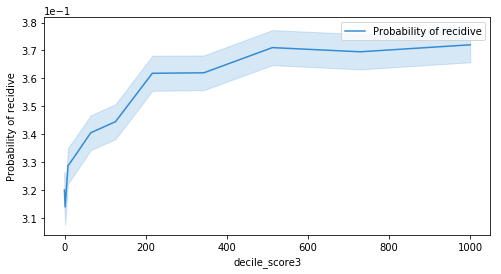

In [19]:
plotNegativeClassFeatureRelation(['decile_score', 'decile_score2', 'decile_score3'])

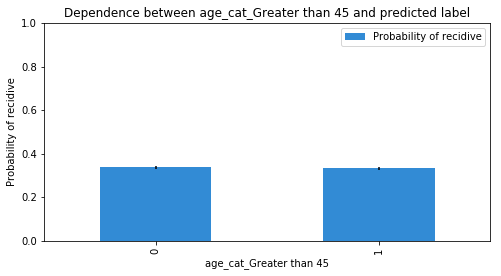

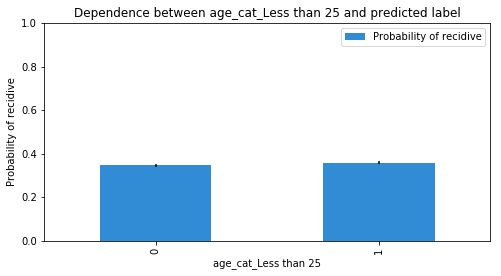

In [22]:
plotNegativeClassFeatureRelation(['age_cat_Greater than 45'])
plotNegativeClassFeatureRelation(['age_cat_Less than 25'])

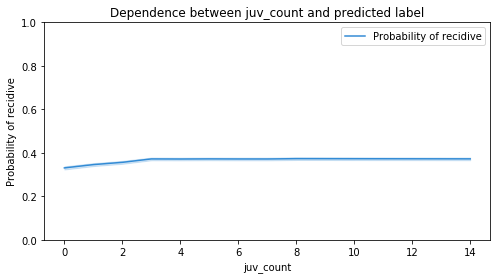

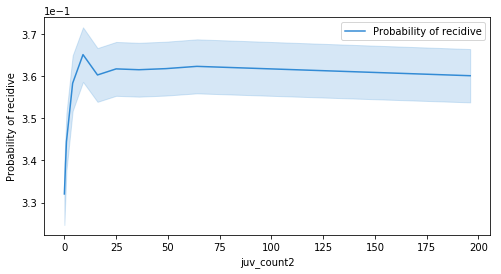

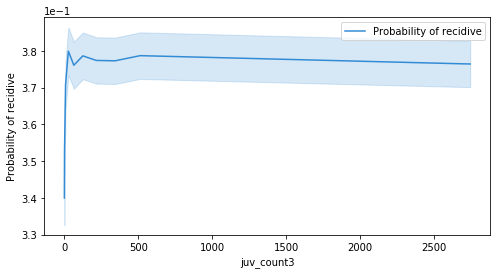

In [21]:
plotNegativeClassFeatureRelation(['juv_count', 'juv_count2', 'juv_count3'])

## Shap values

In [ ]:
# Build an explainer for a random forest model
#explainer = shap.TreeExplainer(model)

# Compute SHAP values
#shap_values = explainer.shap_values(test_x)

In [ ]:
# Plot shap values

#shap.force_plot(explainer.expected_value[0], shap_values[0], train_x)

In [ ]:
# SHAP summary plot

#shap.summary_plot(shap_values, train_x, plot_type="bar")

In [35]:
from feature_selector import FeatureSelector

In [36]:
featureSelector = FeatureSelector(model, train_x, test_x, train_y, test_y, train_x.columns)

In [37]:
featureSelector.featureImportance()

TypeError: featureImportance() takes 0 positional arguments but 1 was given